# mp4 파일 다운로드

In [28]:
import math
import struct
import matplotlib.pyplot as plt
import numpy as np

f_tx = open('/home/k/youngmin/files/log_TX','rb')
f_rx = open('/home/k/youngmin/files/log_RX','rb')
f_rx_filtered = open('/home/k/youngmin/files/log_RX_filtered','rb')
f_rx_abs = open('/home/k/youngmin/files/log_RX_abs','rb')
f_src = open('/home/k/youngmin/files/log_Source','rb')


## TX signal
f_tx.seek(0,2)
num_byte_tx = f_tx.tell()
print(num_byte_tx)
f_tx.seek(0)
i = 0
TX_vector = []
while i <  num_byte_tx:
    data_r = f_tx.read(4)
    data_i = f_tx.read(4)
    i += 8 
    unpacked_r = struct.unpack("<f", data_r)
    unpacked_i = struct.unpack("<f", data_i)
    x = unpacked_r[0] + unpacked_i[0]*1j
    TX_vector.append(x)

## Source signal
f_src.seek(0,2)
num_byte_src = f_src.tell()
print(num_byte_src)
f_src.seek(0)
i = 0
Src_vector = []
while i <  num_byte_src:
    data_r = f_src.read(4)
    data_i = f_src.read(4)
    i += 8 
    unpacked_r = struct.unpack("<f", data_r)
    unpacked_i = struct.unpack("<f", data_i)
    x = unpacked_r[0] + unpacked_i[0]*1j
    Src_vector.append(x)
    
## RX signal    
f_rx.seek(0,2)
num_byte_rx = f_rx.tell()
print(int(num_byte_rx))
f_rx.seek(0)
i = 0
RX_vector = []
while i <  num_byte_rx:
    data_r = f_rx.read(4)
    data_i = f_rx.read(4)
    i += 8 
    unpacked_r = struct.unpack("<f", data_r)
    unpacked_i = struct.unpack("<f", data_i)
    x = unpacked_r[0] + unpacked_i[0]*1j
    RX_vector.append(x)

## RX signal filtered
f_rx_filtered.seek(0,2)
num_byte_rx_filtered = f_rx_filtered.tell()
print(int(num_byte_rx_filtered))
f_rx_filtered.seek(0)
i = 0
RX_vector_filtered = []
while i <  num_byte_rx_filtered:
    data_r = f_rx_filtered.read(4)
    data_i = f_rx_filtered.read(4)
    i += 8 
    unpacked_r = struct.unpack("<f", data_r)
    unpacked_i = struct.unpack("<f", data_i)
    x = unpacked_r[0] + unpacked_i[0]*1j
    RX_vector_filtered.append(x)
    
    
## RX abs signal
'''
f_rx_abs.seek(0,2)
num_byte_rx_abs = f_rx_abs.tell()
print(num_byte_rx_abs)
f_rx_abs.seek(0)
i = 0
RX_abs_vector = []
while i <  num_byte_rx_abs:
    data = f_rx_abs.read(4)
    i += 4
    unpacked = struct.unpack("<f", data)
    RX_abs_vector.append(unpacked)
'''
print('completed')
    

14771200
14771200
14775552
14771200
completed


1775


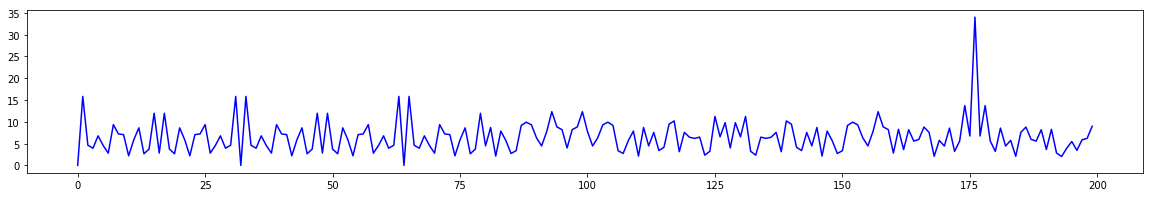

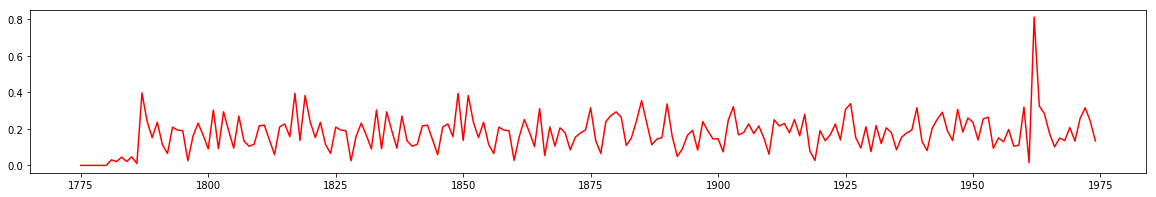

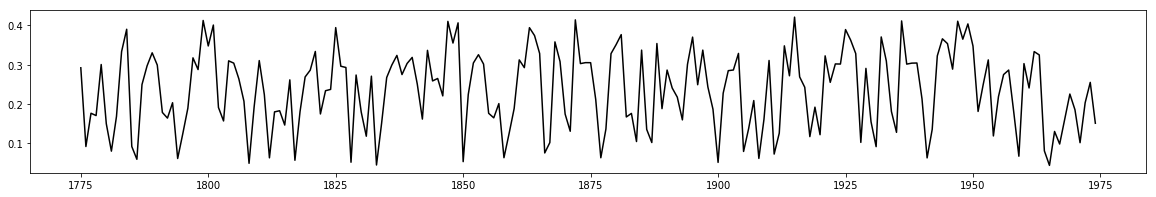

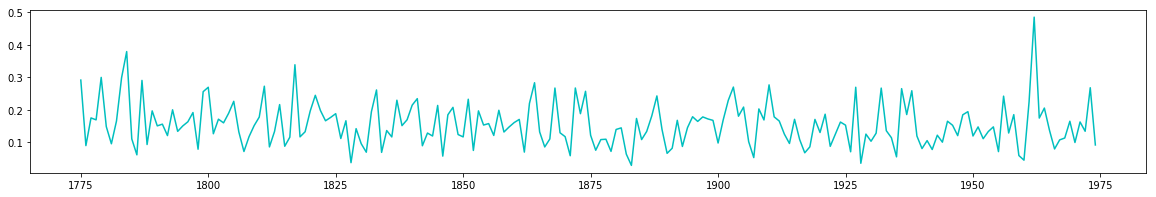

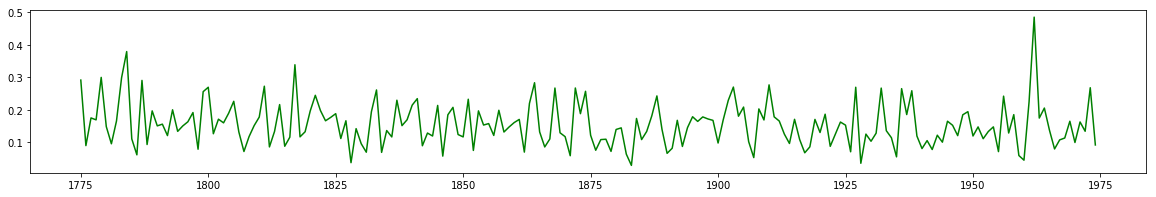

In [34]:
#start_time = 0.008
#sample_rate = 1e6 
#sample_time = 1/sample_rate

#print(sample_time)

n_smpl_out = 10000

n = 0 
flag = 1; 
thres = 0.05 
while (n < 100000 and flag): 
    #print(n)
    if(np.absolute(RX_vector[n])>thres): 
        flag = 0 
        start_index = n 
    n += 1

start_index += 0 
print(start_index)

start_index= 1775
n_smpl_out = 200
delay_src = 0

plt.figure(1,figsize=(20,3)) 
plt.plot(range(0,n_smpl_out),np.absolute(TX_vector[0:n_smpl_out]),'b') 
plt.show()

plt.figure(2,figsize=(20,3)) 
plt.plot(range(start_index,start_index+n_smpl_out),np.absolute(Src_vector[start_index+delay_src:start_index+n_smpl_out+delay_src]),'r') 
plt.show()

plt.figure(1,figsize=(20,3)) 
plt.plot(range(start_index,start_index+n_smpl_out),np.absolute(RX_vector[start_index:start_index+n_smpl_out]),'k') 
plt.show()

plt.figure(1,figsize=(20,3)) 
plt.plot(range(start_index,start_index+n_smpl_out),np.absolute(RX_vector_filtered[start_index:start_index+n_smpl_out]),'c') 
plt.show()


AAA = np.array(RX_vector[start_index:start_index+n_smpl_out])  
BBB = np.array(Src_vector[start_index+delay_src:start_index+n_smpl_out+delay_src])
plt.figure(1,figsize=(20,3)) 
plt.plot(range(start_index,start_index+n_smpl_out),np.absolute(AAA-BBB),'g') 
plt.show()

#plt.plot(range(n_smpl_out),5*np.absolute(RX_vector[start_index:start_index+n_smpl_out]),'r')

#plt.plot(range(n_smpl_out),5*np.absolute(RX_vector_filtered[start_index+3:start_index+n_smpl_out+3]),'c')


In [444]:
NN = 10 # size of RW matrix

length_corr = len(RX_vector) - NN
len(RX_vector)

R_W = np.zeros([NN,NN],dtype=complex)

for n in range(NN):
    for m in range(NN):
        i = int(np.abs(n-m))
        R_W[n,m] = np.mean(np.multiply(RX_vector[start_index:start_index+n_smpl_out],np.conj(RX_vector[start_index+i:start_index+n_smpl_out+i])))

print(R_W)
R_SW = np.zeros(NN,dtype=complex)
for n in range(NN):
    R_SW[n] = np.mean(np.multiply(RX_vector[start_index:start_index+n_smpl_out],np.conj(Src_vector[start_index+n:start_index+n_smpl_out+n])))#
    #R_SW[n] = np.mean(np.multiply(TX_vector[0:n_smpl_out],np.conj(TX_vector[n:n_smpl_out+n])))

AA = np.matmul(np.linalg.inv(R_W),np.conj(R_SW))   
#AA = np.matmul(np.linalg.inv(R_W),R_W)    
print(AA)
#AA_1 = AA
    


[[ 3.93451572e-03+0.00000000e+00j  9.15710091e-04-1.92298103e-07j
  -7.64430046e-04-2.01163894e-05j  3.09496921e-04-4.04566027e-05j
  -2.51463660e-04-9.92947065e-06j -1.52242926e-05-1.83245888e-05j
  -2.37944224e-05-5.58532345e-05j -1.52818173e-04-5.72120436e-05j
   5.03638995e-05-7.03846021e-06j -1.75608902e-04+5.57164241e-05j]
 [ 9.15710091e-04-1.92298103e-07j  3.93451572e-03+0.00000000e+00j
   9.15710091e-04-1.92298103e-07j -7.64430046e-04-2.01163894e-05j
   3.09496921e-04-4.04566027e-05j -2.51463660e-04-9.92947065e-06j
  -1.52242926e-05-1.83245888e-05j -2.37944224e-05-5.58532345e-05j
  -1.52818173e-04-5.72120436e-05j  5.03638995e-05-7.03846021e-06j]
 [-7.64430046e-04-2.01163894e-05j  9.15710091e-04-1.92298103e-07j
   3.93451572e-03+0.00000000e+00j  9.15710091e-04-1.92298103e-07j
  -7.64430046e-04-2.01163894e-05j  3.09496921e-04-4.04566027e-05j
  -2.51463660e-04-9.92947065e-06j -1.52242926e-05-1.83245888e-05j
  -2.37944224e-05-5.58532345e-05j -1.52818173e-04-5.72120436e-05j]
 [ 3.09

0.0142773305561063
0.2499677671231874


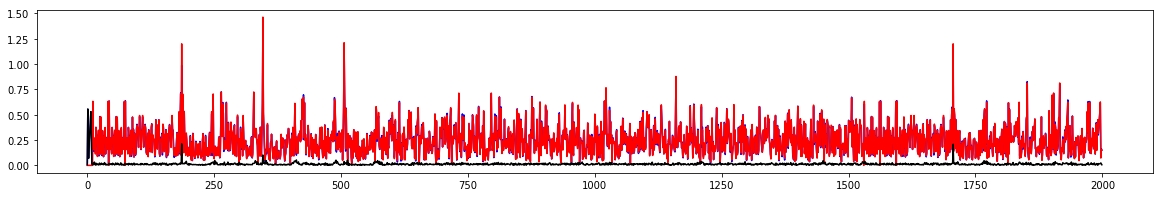

In [439]:
n_smpl_out = 2000
WW = np.convolve(AA,RX_vector[start_index:start_index+n_smpl_out])

print(np.mean(np.abs(Src_vector[start_index:start_index+n_smpl_out]-WW[0:n_smpl_out])))
print(np.mean(np.abs(Src_vector[start_index:start_index+n_smpl_out])))

plt.figure(1,figsize=(20,3))
plt.plot(range(n_smpl_out),np.absolute(WW[0:n_smpl_out]),'b')
plt.plot(range(n_smpl_out),np.absolute(Src_vector[start_index:start_index+n_smpl_out]),'r')
plt.plot(range(n_smpl_out),np.absolute(Src_vector[start_index:start_index+n_smpl_out]-WW[0:n_smpl_out]),'k')
#plt.show()

#plt.figure(1,figsize=(20,3))
#plt.plot(range(n_smpl_out),np.absolute(WW[0:n_smpl_out]+TX_vector[0:n_smpl_out]),'r')
#plt.show()



In [466]:
Src_vector[:10] = Src_vector[:10] - WW[:10]
Src_vector[:10]

[(-0.010959662306531393-0.015141310603881597j),
 (-1.612739372415052+0.4261699210435037j),
 (-0.20365182958953876-0.05120955621460373j),
 (0.22218866186429154-0.017777962753245613j),
 (0.5563874398677855+0.5267406552070105j),
 (0.8927290427443602+0.4172670608285879j),
 (-0.42448508827802955-1.167818283750304j),
 (-0.4258193110345089-1.5327332529755995j),
 (-0.8734521833642561-0.2292175694653672j),
 (0.04958154668660163-0.02649121406543705j)]

In [51]:
aa = [] 
x = 1 + 1.1*1j
y = 2 + 3.1*1j
aa.append(x)
aa.append(y)

print(aa)
print(aa[0].imag)
np.absolute(aa)

xx = [1+2*1j, 2+3*1j]
yy = [2+1*1j, 4+1*1j]

print(np.conj(xx))

#zz = np.multiply(xx,yy)
#print(zz)

#z = x*y
#print(z)

print(np.abs(2-3.3))

[(1+1.1j), (2+3.1j)]
1.1
[1.-2.j 2.-3.j]
1.2999999999999998


In [76]:
R_SW = np.zeros(5,dtype=complex)
R_SW = np.array([1,2,3,4,5])
I = np.eye(5)
print(I)
#print(R_W)

print(np.matmul(R_SW,I))

'''
A = np.array([[1,2],[3,4]])
B = np.array([[2],[3]])
C = np.matmul(A,B)
D = np.linalg.inv(A)
print(D)
E = np.matmul(A,D)
print(E)
#print(A,'\n',B,'\n',C)
'''




[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
<built-in method transpose of numpy.ndarray object at 0x7fcd9cf198a0>


"\nA = np.array([[1,2],[3,4]])\nB = np.array([[2],[3]])\nC = np.matmul(A,B)\nD = np.linalg.inv(A)\nprint(D)\nE = np.matmul(A,D)\nprint(E)\n#print(A,'\n',B,'\n',C)\n"

In [332]:
AA

array([ 0.02685085+0.08623248j, -0.06504251-0.15118482j,
        0.06503819+0.28930845j, -0.09444845-0.41903694j,
        0.06195699+0.5964787j ,  0.00969778-0.96614317j,
       -1.57615233+4.90852843j, -0.34176192-0.15815951j,
        0.3493831 +0.23926862j, -0.39994821-0.24897044j,
        0.17722415+0.13670603j, -0.27174407-0.13603689j,
        0.02660074+0.02784048j, -0.15419339-0.0618807j ,
       -0.01338482-0.0135679j ])

1e-06
10424


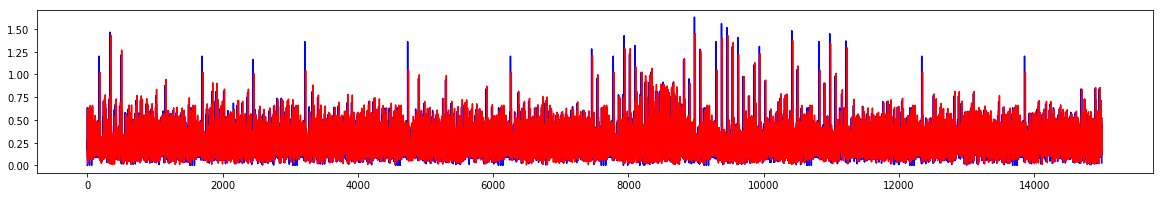

'\nplt.figure(1,figsize=(20,3))\nplt.plot([i*sample_time for i in range(strt_smpl_out,strt_smpl_out + n_smpl_out)],np.absolute(TX_vector[strt_smpl_out:strt_smpl_out+n_smpl_out]))\nplt.show()\n\nplt.figure(1,figsize=(20,3))\nplt.plot([i*sample_time for i in range(strt_smpl_out,strt_smpl_out + n_smpl_out)],np.absolute(RX_vector[strt_smpl_out:strt_smpl_out+n_smpl_out]))\nplt.show()\n\nplt.figure(1,figsize=(20,3))\nplt.plot([i*sample_time for i in range(strt_smpl_out,strt_smpl_out + n_smpl_out)],RX_abs_vector[strt_smpl_out:strt_smpl_out+n_smpl_out])\nplt.show()\n'

In [350]:

#start_time = 0.008

start_time = 0.000
stop_time = 0.015

sample_rate = 1e6
sample_time = 1/sample_rate
print(sample_time)

strt_smpl_out = int(start_time/sample_time)
n_smpl_out = int((stop_time - start_time)/sample_time)

n = 0
flag = 1;
thres = 0.01
while (n < 100000 and flag):
    if(np.absolute(RX_vector[n])>thres):
        flag = 0
        start_index = n
    n += 1
print(start_index)
#start_index = 0

plt.figure(1,figsize=(20,3))
plt.plot(range(n_smpl_out),np.absolute(TX_vector[0:n_smpl_out]),'b')
plt.plot(range(n_smpl_out),5*np.absolute(RX_vector[start_index:start_index+n_smpl_out]),'r')
plt.show()




'''
plt.figure(1,figsize=(20,3))
plt.plot([i*sample_time for i in range(strt_smpl_out,strt_smpl_out + n_smpl_out)],np.absolute(TX_vector[strt_smpl_out:strt_smpl_out+n_smpl_out]))
plt.show()

plt.figure(1,figsize=(20,3))
plt.plot([i*sample_time for i in range(strt_smpl_out,strt_smpl_out + n_smpl_out)],np.absolute(RX_vector[strt_smpl_out:strt_smpl_out+n_smpl_out]))
plt.show()

plt.figure(1,figsize=(20,3))
plt.plot([i*sample_time for i in range(strt_smpl_out,strt_smpl_out + n_smpl_out)],RX_abs_vector[strt_smpl_out:strt_smpl_out+n_smpl_out])
plt.show()
'''

#plt.figure(1,figsize=(20,3))
#plt.plot([i*sample_time for i in range(strt_smpl_out,strt_smpl_out + n_smpl_out)],RX_abs_vector[strt_smpl_out:strt_smpl_out+n_smpl_out])
#plt.show()


In [3]:
Q1 = []
AA = range(10)
print(Q1)
print(AA)



[]
range(0, 10)


In [193]:
Q1[:] = AA
print


NameError: name 'Q1' is not defined

[0.+0.j 0.+0.j]


In [421]:
N_points = 5
N_output = 13
N_symbols = 100

queue1 = []
BB = [i+1 for i in range(N_symbols)]
#print(id(queue1))
queue1.extend(BB)
print(queue1)
#print(id(queue1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [422]:
AA = [1 for i in range(N_points)]
np.convolve(AA,queue1)

#print(id(queue1))

array([  1,   3,   6,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,
        60,  65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120,
       125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185,
       190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250,
       255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315,
       320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380,
       385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445,
       450, 455, 460, 465, 470, 475, 480, 485, 490, 394, 297, 199, 100])

In [348]:
temp_1 = np.convolve(AA,queue1[:N_output])
out0 = temp_1[:N_output] 
del queue1[:N_output-(N_points-1)]

print(out0)
print(queue1)





[ 1  3  6 10 15 20 25 30 35 40 45 50 55]
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [342]:
temp_1 = np.convolve(AA,queue1[:N_output+N_points-1])
out0 = temp_1[N_points-1:N_output+N_points-1] 
del queue1[:N_output] 

print(out0)
print(queue1)


[ 60  65  70  75  80  85  90  95 100 105 110 115 120]
[23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


IndexError: list assignment index out of range

[]